In [107]:



import pandas as pd
import numpy as np
import random as rnd

from sklearn.cross_validation import KFold, cross_val_score

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



train_=pd.read_csv('../train_allcols.csv')
validate_=pd.read_csv('../validate_allcols.csv')
#test=pd.read_csv('../testwDSM.csv')

train_.shape, validate_.shape, #test.shape

((301619, 62), (148560, 62))

In [120]:
train = train_.query('DSMCRIT < 14')
validate = validate_.query('DSMCRIT < 14')
#print train['DSMCRIT'].value_counts()


#train = pd.concat([train,validate])
print train.shape

(295879, 62)


In [121]:
retain_list = [ 'GENDER','ROUTE3','SUB3', 
               'PSYPROB','ROUTE2','SUB2','FRSTUSE3','FREQ3','FRSTUSE2',
               'FREQ2','FREQ1',
               'NOPRIOR','NUMSUBS',
               'FRSTUSE1','AGE','ROUTE1', 'SUB1']

df3 = train.query('DSMCRIT == 9 or DSMCRIT == 4')

print df3.shape
df4 = df3[df3.duplicated(retain_list, keep=False)]
#df4 = df4.query('YEAR ==2010 and AGE == 10') 
df5 = df4.sort_values(retain_list)
print df5.shape#['DSMCRIT', 'SUB1', 'SUB2', 'FREQ1', 'FREQ2']
df6 = df3[df3.duplicated(retain_list+['DSMCRIT'], keep=False)]
print df6.shape
#print df6.head(20)


df7 = pd.concat([df5,df6]).drop_duplicates(retain_list+['DSMCRIT'],keep=False)
print df7.shape
print df7['DSMCRIT'].value_counts()

(108152, 62)
(72245, 62)
(69560, 62)
(2685, 62)
9    1703
4     982
Name: DSMCRIT, dtype: int64


In [122]:
#train = df7
train = pd.concat([train, df7]).drop_duplicates(retain_list,keep=False)

In [123]:
print train.shape
train = train.sample(10000)

(143324, 62)


In [125]:
#train = train.query('SUB1 <= 10').query('SUB2 <= 10')
#validate = validate.query('SUB1 <= 10').query('SUB2 <= 10')

drop_list = ['DSMCRIT',  #'NUMSUBS'
             ]
drop_list_select = ['RACE', 'PREG', 'ARRESTS', 'PSYPROB', 'DETNLF', 'ETHNIC', 'MARSTAT', 'GENDER', 'EDUC'
                   ,'LIVARAG', 'EMPLOY', 'SUB3']

retain_list = ['RACE','PCPFLG','PRIMINC','LIVARAG','BENZFLG','HLTHINS','GENDER','ROUTE3','PRIMPAY',
               'MARSTAT','PSYPROB','ROUTE2','EMPLOY','SUB2','FRSTUSE3','FREQ3','FRSTUSE2','OTHERFLG',
               'EDUC','FREQ2','FREQ1','YEAR',
               'PSOURCE','DETCRIM','DIVISION','REGION','NOPRIOR','NUMSUBS','ALCDRUG',
               'METHUSE','FRSTUSE1','AGE','COKEFLG','OPSYNFLG','IDU','SERVSETA','ROUTE1','MARFLG',
               'MTHAMFLG','HERFLG',
               'ALCFLG','SUB1']
X_train = train[retain_list]
#X_train = train.drop(drop_list + drop_list_select, axis=1)
Y_train = train["DSMCRIT"]

X_train.shape, #X_validate.shape, #X_test.shape



((10000, 42),)

In [126]:
print X_train.columns.tolist()

['RACE', 'PCPFLG', 'PRIMINC', 'LIVARAG', 'BENZFLG', 'HLTHINS', 'GENDER', 'ROUTE3', 'PRIMPAY', 'MARSTAT', 'PSYPROB', 'ROUTE2', 'EMPLOY', 'SUB2', 'FRSTUSE3', 'FREQ3', 'FRSTUSE2', 'OTHERFLG', 'EDUC', 'FREQ2', 'FREQ1', 'YEAR', 'PSOURCE', 'DETCRIM', 'DIVISION', 'REGION', 'NOPRIOR', 'NUMSUBS', 'ALCDRUG', 'METHUSE', 'FRSTUSE1', 'AGE', 'COKEFLG', 'OPSYNFLG', 'IDU', 'SERVSETA', 'ROUTE1', 'MARFLG', 'MTHAMFLG', 'HERFLG', 'ALCFLG', 'SUB1']


In [127]:
#one hot
from sklearn import preprocessing

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_train)

# 3. Transform
onehotlabels = enc.transform(X_train).toarray()
X_train = onehotlabels



X_train.shape, #X_validate.shape

((10000, 244),)

In [128]:
# Linear SVC
linear_svc = LinearSVC(C=1.0)
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)

l_acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=3)
acc_linear_svc = round(np.mean(l_acc_linear_svc), 3)
l_acc_linear_svc = ['%.3f' % elem for elem in l_acc_linear_svc]
print l_acc_linear_svc
print acc_linear_svc

['0.712', '0.714', '0.710']
0.712


In [129]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)

l_acc_log = cross_val_score(logreg, X_train, Y_train, cv=3)
acc_log = round(np.mean(l_acc_log), 3)

l_acc_log = ['%.3f' % elem for elem in l_acc_log]
print l_acc_log
print acc_log

['0.706', '0.714', '0.712']
0.711


Confusion matrix, without normalization
[[ 281    9    2    2    1    1    1    0]
 [   4 1794   15   70   33   31   10    0]
 [   0   19 1904   54   20   47    0    1]
 [   0   33   17  766   67   13    3    3]
 [   0   31   16   24  767   25    0   23]
 [   3  140  179  114  122 1451    1    7]
 [   1  301    2   31   20   12   39    1]
 [   0   12    9    2  171   17    1   62]]


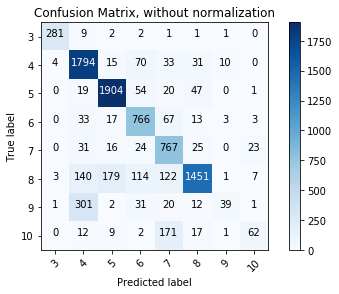

Normalized confusion matrix
[[  9.46e-01   3.03e-02   6.73e-03   6.73e-03   3.37e-03   3.37e-03
    3.37e-03   0.00e+00]
 [  2.04e-03   9.17e-01   7.66e-03   3.58e-02   1.69e-02   1.58e-02
    5.11e-03   0.00e+00]
 [  0.00e+00   9.29e-03   9.31e-01   2.64e-02   9.78e-03   2.30e-02
    0.00e+00   4.89e-04]
 [  0.00e+00   3.66e-02   1.88e-02   8.49e-01   7.43e-02   1.44e-02
    3.33e-03   3.33e-03]
 [  0.00e+00   3.50e-02   1.81e-02   2.71e-02   8.66e-01   2.82e-02
    0.00e+00   2.60e-02]
 [  1.49e-03   6.94e-02   8.87e-02   5.65e-02   6.05e-02   7.19e-01
    4.96e-04   3.47e-03]
 [  2.46e-03   7.40e-01   4.91e-03   7.62e-02   4.91e-02   2.95e-02
    9.58e-02   2.46e-03]
 [  0.00e+00   4.38e-02   3.28e-02   7.30e-03   6.24e-01   6.20e-02
    3.65e-03   2.26e-01]]


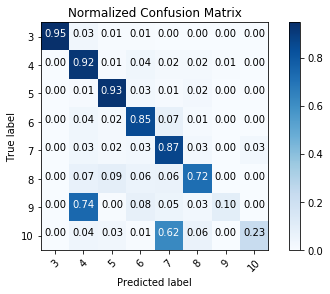

In [131]:
X_validate = X_train
Y_validate = Y_train

import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = linear_svc.predict(X_validate)


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_validate, Y_pred, labels=[3,4,5,6,7,8,9,10])

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = cm #confusion_matrix(y_test, Y_pred)
#class_names = ["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]
class_names = [3,4,5,6,7,8,9,10]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names,
                      title='Confusion Matrix, without normalization')


#plt.savefig('cnf matrix', dpi=150)
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

#plt.figure(figsize=(16,8))
#plt.savefig('cnf matrix norm', dpi=150)
plt.show()
